Take this dataset: https://www.kaggle.com/felipeesc/shark-attack-dataset. Use all the skills you've learned up until now to answer the following questions as well as possible.

1.   what are the most dangerous types of sharks to humans?
2.   are children more likely to be attacked by sharks?
3.   are shark attacks where sharks were provoked more or less dangerous?
4.   are certain activities more likely to result in a shark attack?

If you feel you can't answer a question based on the dataset alone, feel free to find other datasets and use them in answering the questions.

For each answer you give not only answer the question but also write about the assumptions you made in answering the question. If an assumption or decision possibly created a bias please write about this as well.

# Inlezen Dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%load_ext google.colab.data_table

In [ ]:
# inlezen dataframe
df = pd.read_csv("attacks.csv", encoding='cp1252')

# Dataframe bekijken en grof cleanen

In [ ]:
display(df)
display(df.columns)

Case Number         Date    Year        Type    Country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  Area                        Location     Activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Glynn County     Standing   
2               Hawaii                    Habush, Oahu      Surfing   
3      New South Wales              Arrawarra Headland      Surfing   
4               Colima                        La Ticla  Free diving   
...                ...                             ...          ...   
25718              NaN                             NaN          NaN   
25719              NaN                             NaN          NaN   
25720              NaN                             NaN          NaN   
25721              NaN                             NaN          NaN   
25722              NaN                             NaN          NaN   

                  Name Sex   ...         Species   \
0          Julie Wolfe    F  ...      White shark   
1      Adyson McNeely     F  ...              NaN   
2          John Denges    M  ...              NaN   
3                 male    M  ...        2 m shark   
4       Gustavo Ramos     M  ...  Tiger shark, 3m   
...                ...  ...  ...              ...   
25718              NaN  NaN  ...              NaN   
25719              NaN  NaN  ...              NaN   
25720              NaN  NaN  ...              NaN   
25721              NaN  NaN  ...              NaN   
25722              NaN  NaN  ...              NaN   

               Investigator or Source                       pdf  \
0                    R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1      K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2      K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3                      B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4                           A .Kipper      2018.06.04-Ramos.pdf   
...                               ...                       ...   
25718                             NaN                       NaN   
25719                             NaN                       NaN   
25720                             NaN                       NaN   
25721                             NaN                       NaN   
25722                             NaN                       NaN   

                                            href formula  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...   
1      http://sharkattackfile.net/spreadsheets/pdf_di...   
2      http://sharkattackfile.net/spreadsheets/pdf_di...   
3      http://sharkattackfile.net/spreadsheets/pdf_di...   
4      http://sharkattackfile.net/spreadsheets/pdf_di...   
...                                                  ...   
25718                                                NaN   
25719                                                NaN   
25720                                                NaN   
25721                                                NaN   
25722                                                NaN   

                                                    href Case Number.1  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1      http://sharkattackfile.net/spreadsheets/pdf_di...    2

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [ ]:
# Verwijder spaties aan het eind of aan het begin van een kolom met strip:
df = df.rename(columns=lambda x: x.strip())

In [ ]:
# alle kolommen vanaf 'pdf' droppen (behalve original order), omdat je dan het aantal kolommen terugbrengt tot onder de 20
remove = ['pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'Unnamed: 22',
       'Unnamed: 23']   
df2 = df.drop(remove, axis=1)



In [ ]:
# Verwijder alle rijen die minder  dan 4 "non NaNs" hebben
df3 = df2.dropna(thresh=4, axis=0)

In [ ]:
# Nu de dataframe redelijk schoon is kunnen we verder met de mooie view (data_table)

# Welke kolommen zijn nodig voor de vragen:

# 1. what are the most dangerous types of sharks to humans?
# gebruik de kolommen 'Fatal (Y/N)' en 'Species'

# 2. are children more likely to be attacked by sharks?
# gebruik de 'Age' kolom

# 3. are shark attacks where sharks were provoked more or less dangerous?
# Gebruik de 'Type' kolom

# 4. are certain activities more likely to result in a shark attack?
# Gebruik de kolommen 'Activity' en eventueel 'Fatal (Y/N)')

In [ ]:
# Percentage missing values:
print("Missing values in percentage, per column:")
df3.isnull().mean() * 100

Missing values in percentage, per column:


Case Number                0.015868
Date                       0.000000
Year                       0.031736
Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal (Y/N)                8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
original order             0.000000
dtype: float64

Vooral de kolommen Age (45%), Time (53%) en Species (45%) hebben heel veel missing data.

In [ ]:
total_rows = df3.shape[0]
print(f"De grof gecleande database heeft {total_rows} rijen")

De grof gecleande database heeft 6302 rijen


In [ ]:
df3

Case Number         Date    Year        Type             Country  \
0     2018.06.25  25-Jun-2018  2018.0     Boating                 USA   
1     2018.06.18  18-Jun-2018  2018.0  Unprovoked                 USA   
2     2018.06.09  09-Jun-2018  2018.0     Invalid                 USA   
3     2018.06.08  08-Jun-2018  2018.0  Unprovoked           AUSTRALIA   
4     2018.06.04  04-Jun-2018  2018.0    Provoked              MEXICO   
...          ...          ...     ...         ...                 ...   
6297     ND.0005  Before 1903     0.0  Unprovoked           AUSTRALIA   
6298     ND.0004  Before 1903     0.0  Unprovoked           AUSTRALIA   
6299     ND.0003    1900-1905     0.0  Unprovoked                 USA   
6300     ND.0002    1883-1889     0.0  Unprovoked              PANAMA   
6301     ND.0001    1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                   Area                             Location      Activity  \
0            California          Oceanside, San Diego County      Paddling   
1               Georgia       St. Simon Island, Glynn County      Standing   
2                Hawaii                         Habush, Oahu       Surfing   
3       New South Wales                   Arrawarra Headland       Surfing   
4                Colima                             La Ticla   Free diving   
...                 ...                                  ...           ...   
6297  Western Australia                          Roebuck Bay        Diving   
6298  Western Australia                                  NaN  Pearl diving   
6299     North Carolina                       Ocracoke Inlet      Swimming   
6300                NaN                 Panama Bay 8ºN, 79ºW           NaN   
6301   Eastern Province  Below the English fort, Trincomalee      Swimming   

                       Name Sex  Age  \
0               Julie Wolfe   F   57   
1           Adyson McNeely    F   11   
2               John Denges   M   48   
3                      male   M  NaN   
4            Gustavo Ramos    M  NaN   
...                     ...  ..  ...   
6297                   male   M  NaN   
6298                  Ahmun   M  NaN   
6299  Coast Guard personnel   M  NaN   
6300        Jules Patterson   M  NaN   
6301                   male   M   15   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
6297                                              FATAL           Y   
6298                                              FATAL           Y   
6299                                              FATAL           Y   
6300                                              FATAL           Y   
6301  FATAL. "Shark bit him in half, carrying away t...           Y   

               Time          Species                 Investigator or Source  \
0             18h00      White shark                       R. Collier, GSAF   
1     14h00  -15h00              NaN         K.McMurray, TrackingSharks.com   
2             07h45              NaN         K.McMurray, TrackingSharks.com   
3               NaN        2 m shark                         B. Myatt, GSAF   
4               NaN  Tiger shark, 3m                              A .Kipper   
...             ...              ...                                    ...   
6297            NaN              NaN       H. Taunton; N. Bartlett,  p. 234   
6298            NaN              NaN  H. Taunton; N. Bartlett,  pp. 233-234   
6299            NaN              NaN   F. Schwartz, p.23; C. Creswell, GSAF   
6300            NaN              NaN                    The Sun, 10

# Dataframe cleanen per kolom

## Functies gebruikt voor cleanen

In [ ]:
def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)


def look_at_unique_values(column): 
  unique_values_cutoff = 150  # Mocht je de hele lijst willen zien, dan 50 veranderen in bijv 160 of 260
    # Het gekke is dat het mij wel lukt om de lijst te sorteren bij kolom: "q4-country"
    # Met:
    # sorted = df.loc[:,'q4-country'].sort_values()
    # sorted.unique() 
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values (total: {num_unique_values}):")
    # We may get an error when sorting
    try:
      sorted = np.sort(unique_values) # Op stack overflow staat dat .sort verouderd is: deze regel oorspronkelijk
      # sorted = df.loc[:, 'q4-country'].sort_values() # Er zelf bij gemaakt, weet niet hoe je de kolom generiek maakt
      # sorted.unique() # Er zelf bij gemaakt
      print("Values are sorted")
      # display(list(sorted.unique())) # Oorspronkelijk zonder .unique() Dit geeft de lijst op elke regel een nieuw land
      display(sorted.unique()) # Er zelf bij gemaakt Dit geeft de lijst met op elke regel meerdere landen, compacter
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")


def look_at_edges(df, column_name):
  # inner function
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  column = df[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f"Could not sort values: {error}")
      print("..so let's try filtering NULL values and then sorting")
      non_null_uniques = df.loc[~df[column_name].isnull(), column_name].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)


def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")


def find_non_default_missing_values(df, column_name, maybe_type):
  long_separator_amount = 80
  short_separator_amount = 40

  print_separator("*", long_separator_amount, f"Finding non default missing values for column \"{column_name}\"")

  print(f"Column \"{column_name}\" has datatype: {df.dtypes[column_name]}")

  column = df[column_name]  

  # A
  print_separator("-", short_separator_amount, "A: Looking at unique values")
  look_at_unique_values(column)

  # B
  print_separator("-", short_separator_amount, "B: Sorting and looking at the edges")
  look_at_edges(df, column_name)

  # C
  print_separator("-", short_separator_amount, f"C: Casting to type: {maybe_type}")
  cast_to_type(column, maybe_type)

  # D
  print_separator("-", short_separator_amount, "D: Looking at frequency")
  display(column.value_counts(dropna=False))

  print("\n")

In [ ]:
# Eigenlijk niet nodig, want functie in een functie, kun je ook zelf
def replace_value(df, column_name, missing_old, missing_new):
  # ⚠️ Mutates df
  df.loc[:, column_name] = df[column_name].replace({missing_old: missing_new})


# Helper functions
def display_default_null_values(df, column_name):
  nulls = df.loc[df[column_name].isnull()]
  print(f"Number of default null values in \"{column_name}\": {len(nulls)}")


# Easier to type
nat = np.datetime64('nat')

## Kolom 'Fatal (Y/N)'

In [ ]:
# Bekijk de kolom 'Fatal (Y/N)'
find_non_default_missing_values(df3, "Fatal (Y/N)", "string")




********************************************************************************
Finding non default missing values for column "Fatal (Y/N)"
********************************************************************************
Column "Fatal (Y/N)" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 150 unique values (total: 9):
Could not sort values


['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y']



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', 'y']

[' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', 'y']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


N          4293
Y          1388
NaN         539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [ ]:
# Cleanen van de kolom 'Fatal (Y/N)':

# We willen NaN veranderen in None
# We willen UNKNOWN en 2017 veranderen in None
# We willen M veranderen in N (zitten naast elkaar op  het toetsenbord, waarschijnlijk tikfout)

replace_value(df3, 'Fatal (Y/N)', np.nan, None)
replace_value(df3, 'Fatal (Y/N)', "UNKNOWN", None)
replace_value(df3, 'Fatal (Y/N)', "2017", None)
replace_value(df3, 'Fatal (Y/N)', "M", "N")
replace_value(df3, 'Fatal (Y/N)', " N", "N")
replace_value(df3, 'Fatal (Y/N)', "N ", "N")
replace_value(df3, 'Fatal (Y/N)', "y", "Y")


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df3['Fatal (Y/N)'].unique()

array(['N', 'Y', None], dtype=object)

## Kolom 'Species'

In [ ]:
# LET OP! Het maken van een nieuwe kolom 'New_Species' staat onder 
# het hoofdstukje 'Dataframe: maken extra kolommen'

# Bekijk de kolom 'Species'
find_non_default_missing_values(df3, "Species", "string")




********************************************************************************
Finding non default missing values for column "Species"
********************************************************************************
Column "Species" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 150 unique values (total: 1550)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' ',
 ' "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']',
 " 1.5 m [5'] dusky shark",
 " 6' to 8' shark",
 " Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7'] ",
 ' Bull shark, 1.2m ',
 ' Bull shark, 2.5 m',
 " Bull shark, 5'",
 " Bull shark, 8'",
 " Galapagos shark, 6'"]

['small hammerhead shark',
 'small nurse shark',
 'small shark',
 'small sharks',
 "small sharks'",
 'unknown, possibly a white shark',
 'whaler shark',
 'white shark',
 '\xa0 ',
 '“small brown shark”']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


NaN                                                                                                                              2838
White shark                                                                                                                       163
Shark involvement prior to death was not confirmed                                                                                105
Invalid                                                                                                                           102
Shark involvement not confirmed                                                                                                    88
                                                                                                                                 ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                   1
Bull shark, 2.3 m [7.5']                                      

In [ ]:
# In de Species kolom de NaN's vervangen door None's
df3.loc[:,"Species"] = df3.loc[:,"Species"].replace({np.NaN: None})

## Kolom 'Age'

In [ ]:
# Bekijk de kolom 'Age'
find_non_default_missing_values(df3, "Age", "float64")



********************************************************************************
Finding non default missing values for column "Age"
********************************************************************************
Column "Age" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 150 unique values (total: 158)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' ',
 '  ',
 ' 28',
 ' 30',
 ' 43',
 '"middle-age"',
 '"young"',
 '(adult)',
 '1',
 '10']

['MAKE LINE GREEN',
 'Teen',
 'Teens',
 'X',
 'adult',
 'mid-20s',
 'mid-30s',
 'teen',
 'young',
 '\xa0 ']



----------------------------------------
C: Casting to type: float64
----------------------------------------
Could not cast to float64: could not convert string to float: '40s'


----------------------------------------
D: Looking at frequency
----------------------------------------


NaN               2831
17                 154
18                 150
19                 142
20                 141
                  ... 
20?                  1
 28                  1
7      &    31       1
 30                  1
13 or 14             1
Name: Age, Length: 158, dtype: int64

In [ ]:
df3['Age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [ ]:
# STRATEGIE:
# Omdat de exacte leeftijd van personen niet van belang was, heb ik de volgende strategie toegepast:
# Iedereen jonger dan 18 jaar is een kind
# Iedereen ouder of gelijk aan 18 jaar is volwassen
# Er is voor gekozen om voor elke rij maximaal één slachtoffer te nemen.
# Als duidelijk was welke leeftijd ongeveer werd bedoeld dan werd die leeftijd ingevuld.
# In het geval waarbij er zowel volwassenen als kinderen in één rij stonden, dan is er voor gekozen om aan die waarde een null value toe te kennen.
# Waren er meerdere kinderen bij een incident betrokken, dan werd de leeftijd van een kind ingevuld.
# Waren er meerdere volwassenen bij een incident betrokken, dan werd de leeftijd van een volwassene ingevuld.
# Was minimaal één leeftijd duidelijk dan werd deze ingevuld
# Was niet duidelijk of er een kind of een volwassene bij betrokken was, dan werd een null value ingevuld

# UITWERKING STRATEGIE:
# Overbodige spaties en strings en tekens verwijderen en alles omzetten naar lower case
# M.b.v. een for loop en code het onderstaande uitvoeren:
  # Waar 'or , '&' of 'to' in de string staat: als betreffende leeftijden behoren tot dezelfde groep, deze vervangen door een integer in de goede groep
  # Waar 'or , '&' of 'to' in de string staat: als de betreffende leeftijden NIET behoren tot dezelfde groep, deze vervangen door 999 en later in np.NAN (Dit is niet ideaal!!!!)
  # Waar 'or , '&' of 'to' in de string staat: van de betreffende leeftijden is er één onbekend, kies dan voor de bekende
# De overige waardes m.b.v. een mapping dict omzetten in leeftijden.

# Bovenstaande is misschien niet optimaal, wat betreft effectiviteit en tijd,
# maar door de verschillende methodes te gebruiken leer ik er wel veel van :).

In [ ]:
# Vervang alle NaN's tijdelijk door 999
df3.loc[:,'Age'] = df3['Age'].fillna(999)

# casten naar string:
df3.loc[:,"Age"] = df3.loc[:,"Age"].astype(str)

# Overbodige spaties en strings en tekens verwijderen en alles omzetten naar lower case:
df3.loc[:, 'Age'] = df3.loc[:,'Age'].str.lower()
df3.loc[:, 'Age'] = df3.loc[:,'Age'].apply(lambda x: str(x).strip())
df3.loc[:, 'Age'] = df3.loc[:,'Age'].apply(lambda x: str(x).rstrip('s').strip("'").strip('"'). strip('()>&? ').rstrip('½'))


In [ ]:
# df3['Age'].unique()

In [ ]:
# Veranderen van set option om alle value counts te zien:
pd.set_option("display.max_rows", None)
df3.loc[:,"Age"].value_counts()

999                        2831
17                          154
20                          150
18                          150
19                          143
15                          139
16                          138
21                          120
22                          117
25                          108
24                          106
14                          102
13                           94
30                           84
26                           83
28                           81
23                           80
29                           78
27                           78
12                           73
35                           69
32                           69
40                           59
10                           56
31                           52
34                           50
38                           48
33                           44
43                           44
36                           43
37                           42
42      

In [ ]:
# resetten naar standaard setting:
pd.reset_option("display.max_rows")

Funtie om de regels met '&', 'or' en 'to' aan te pakken:

In [ ]:
# Funtie om de regels met '&', 'or' en 'to' aan te pakken:

for i in range(len(df3)):
  row = df3.loc[:, 'Age'].iloc[i]
  # print(row)    
  if '&' in row or 'or' in row or 'to' in row:
    first_string = row.split()[0]
    if first_string.isnumeric():
      first_string = int(row.split()[0]) 
    else:
      continue
    last_string = row.split()[-1]
    if last_string.isnumeric():
      last_string = int(row.split()[-1]) 
    else:
      continue
    if (first_string >= 18 and last_string >= 18) or (first_string < 18 and last_string < 18):
      row = first_string
    elif (first_string < 18 and last_string >= 18) or (first_string >= 18 and last_string < 18):
      row = 999 # Dit worden later np.NaN's
  # nieuwe waarden toekennen aan df.iloc[i]:  
  df3['Age'].iloc[i] = row
  # print(row) 

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# df3['Age'].unique()

In [ ]:
# casten naar string: (nodig voor de mapping dict)
df3.loc[:,"Age"] = df3.loc[:,"Age"].astype(str)

mapping_dict om 'Age' kolom verder te cleanen

In [ ]:
# # Maak een mapping_dict om de waardes in de kolom 'Age' te veranderen
# # Dit gebeurd EENMALIG! mapping_dict wordt opgeslagen in de variabele mapping_dict_age na afloop

# # Maak een lijst van alle unique waardes in de kolom 'Age'
# age_column = list(df3.loc[:,'Age'].unique()) 

# # display(age_column)

# mapping_dict_age = {}

# for age in age_column:
#   if age.isnumeric():
#       continue
#   else: 
#       print(age)
#       _input = input()
#       if _input == '':
#         mapping_dict_age[age] = age                          
#       else:
#         mapping_dict_age[age] = _input
# print(mapping_dict_age)

In [ ]:
mapping_dict_age = {'teen': '15', '18 month': '2', '28, 23 & 30': '28',
                    '': '999', 'mid-30': '35', 'elderly': '40', 'mid-20': '25',
                    'ca. 33': '33', 'adult': '40', '9 month': '1',
                    '37, 67, 35, 27,  ? & 27': '37', '21, 34,24 & 35': '21',
                    'x': '999', 'middle-age': '50', '2 to 3 month': '0',
                    'make line green': '999', 'young': '5', 'f': '999',
                    'both 11': '11', 'a.m.': '999'}

In [ ]:
# Replace the keys in  the 'mapping_dict_age' for the values:
for key, val in mapping_dict_age.items():
  df3.loc[:,'Age'] = df3.loc[:,'Age'].replace(mapping_dict_age)   

In [ ]:
# Casten naar integer:
# Using Series.astype() to convert to integer 
df3.loc[:,"Age"] = df3.loc[:,"Age"].astype(int)

# Replace 999 by np.NaN
df3.loc[:,'Age'] = df3.loc[:,'Age'].replace({999 : np.NaN})

In [ ]:
# De integers zijn nu allemaal floats geworden
df3.Age.unique()

array([57., 11., 48., nan, 18., 52., 15., 12., 32., 10., 21., 34., 30.,
       60., 33., 29., 54., 41., 37., 56., 19., 25., 69., 38., 55., 35.,
       46., 45., 14., 40., 28., 20., 24., 26., 49., 22.,  7., 31., 17.,
       13., 42.,  3.,  8., 50., 16., 82., 73., 68., 51., 39., 58., 47.,
       61., 65., 36., 66., 43.,  9., 72., 59.,  6., 27., 64., 23., 71.,
       44., 62., 63., 70.,  2., 53., 77., 74.,  5., 86., 84., 75., 87.,
       67.,  1.,  0., 81., 78.])

In [ ]:
# Zie voor een nieuwe kolom 'Adult/Child', met alleen de waardes 'child' en
# 'adult': vraag 2.

## Kolom 'Type'

In [ ]:
# Bekijk de kolom 'Type'
find_non_default_missing_values(df3, "Type", "string")



********************************************************************************
Finding non default missing values for column "Type"
********************************************************************************
Column "Type" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 150 unique values (total: 9):
Could not sort values


['Boating',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 nan,
 'Boat',
 'Boatomg']



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


['Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked']

['Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
NaN                4
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [ ]:
df3['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [ ]:
# Alles wat niet 'Provoked' en niet 'Unprovoked' is omzetten naar None
df3.loc[:,'Type'][~df3['Type'].isin(["Provoked", "Unprovoked"])] = None

<ipython-input-36-e80e85f5021f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'Type'][~df3['Type'].isin(["Provoked", "Unprovoked"])] = None
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3['Type'].unique()

array([None, 'Unprovoked', 'Provoked'], dtype=object)

## Kolom 'Activity'

In [ ]:
# LET OP! Het maken van een nieuwe kolom 'New_Activity' staat onder 
# het hoofdstukje 'Dataframe: maken extra kolommen'

# Bekijk de kolom 'Activity'
find_non_default_missing_values(df3, "Activity", "string")



********************************************************************************
Finding non default missing values for column "Activity"
********************************************************************************
Column "Activity" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 150 unique values (total: 1533)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '"Swimming vigorously"',
 '.']

['preparing to go skin diving',
 'pêcheur de bichiques',
 'seaplane Columbus ditched in the sea',
 'ship M.V. Rizal sank during typhoon',
 'ship William Penn grounded & broke apart',
 'ship torpedoed 400 miles off the African coas. Man was clinging to hatch cover',
 'small boat',
 'wreck of the State Oil Company ship Permina',
 'yachting accident',
 'yachtsman in a zodiac']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


Surfing                                   971
Swimming                                  869
NaN                                       544
Fishing                                   431
Spearfishing                              333
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: Activity, Length: 1533, dtype: int64

In [ ]:
df3.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'original order'],
      dtype='object')

In [ ]:
# Bekijk alle 1533 unieke 'Activity' met crosstabs
pd.crosstab(df3["Activity"], df3["Fatal (Y/N)"])

Fatal (Y/N)                                         N  Y
Activity                                                
                                                    1  0
                                                    1  0
 a canoe was pursuing a schooner that had forci...  0  1
"Boat accident"                                     0  1
"Climbing up to ship after repairing the stern ...  0  1
...                                                .. ..
ship William Penn grounded & broke apart            1  0
ship torpedoed 400 miles off the African coas. ...  1  0
wreck of the State Oil Company ship Permina         0  1
yachting accident                                   0  1
yachtsman in a zodiac                               1  0

[1414 rows x 2 columns]

In [ ]:
# In de Activity kolom de NaN's vervangen door None's, mochten die er zijn
df3.loc[:,"Activity"] = df3.loc[:,"Activity"].replace({np.NaN: None})
df3.loc[:,"Activity"] = df3.loc[:,"Activity"].replace({".": None})
df3.loc[:,"Activity"] = df3.loc[:,"Activity"].replace({"kakaying": "kayaking"})
df3.loc[:,"Activity"] = df3.loc[:,"Activity"].replace({"male": None})

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# Dataframe: maken extra kolommen

### Maak nieuwe kolom 'New_Species' gebaseerd op de kolom 'Species'

In [ ]:
df3.loc[:,'Species'].sort_values()

3622        
5555        
1357        
1348        
1454        
        ... 
6297    None
6298    None
6299    None
6300    None
6301    None
Name: Species, Length: 6302, dtype: object

In [ ]:
# Toon de ongeveer 1500 verschillende 'Species' om een groffe inspectie te doen
# Dit is tot nu toe de handigste methode die ik heb gevonden om door de kolom 'Species te lopen'
pd.crosstab(df3["Species"], df3["Fatal (Y/N)"])

Fatal (Y/N)                                         N  Y
Species                                                 
                                                    4  1
 "gummy" shark (Rhizoprionodon or Loxodon) 1.2 ...  1  0
 1.5 m [5'] dusky shark                             1  0
 6' to 8' shark                                     1  0
 Blacktip shark, C. maculipinnis. 1.9 m to 2.1 ...  1  0
...                                                .. ..
unknown, possibly a white shark                     1  0
whaler shark                                        1  0
white shark                                         1  0
                                                    2  0
“small brown shark”                                 1  0

[1491 rows x 2 columns]

In [ ]:
# Alles in Species naar lower case letters brengen
df3.loc[:,'Species'] = df3.loc[:,'Species'].str.lower()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Alle None's vervangen door de string "leeg" anders doet str.contains het niet
df3.loc[:,"Species"] = df3.loc[:,"Species"].fillna("leeg")

In [ ]:
# Maak nieuwe kolom "New_Species" met in elke cel de waarde 0
df3['New_Species'] = 0

# Vul de kolom 'New_Species' met haaiensoorten, gehaald uit de kolom 'Species':
# Onderstaande lijst toont de substrings die, indien aanwezig, zorgen dat de
# gehele string wordt vervangen door een string met de specifieke haaiensoort
# De volgende methode vult overal NaN's in als één van de opgegeven strings niet aanwezig is:

df3.loc[df3['Species'].str.contains('blacktip'), 'New_Species'] = 'blacktip shark'
df3.loc[df3['Species'].str.contains('bull'), 'New_Species'] = 'bull shark'
df3.loc[df3['Species'].str.contains('bronze'), 'New_Species'] = 'bronze whaler shark'
df3.loc[df3['Species'].str.contains('blue'), 'New_Species'] = 'blue nose/blue whaler/blue pointeshark'
df3.loc[df3['Species'].str.contains('bonita'), 'New_Species'] = 'bonita shark'
df3.loc[df3['Species'].str.contains('broadnose'), 'New_Species'] = 'broadnose sevengill shark'
df3.loc[df3['Species'].str.contains('caribbean'), 'New_Species'] = 'caribbean reef shark'
df3.loc[df3['Species'].str.contains('carpet'), 'New_Species'] = 'carpet shark'
df3.loc[df3['Species'].str.contains('copper'), 'New_Species'] = 'copper shark'
df3.loc[df3['Species'].str.contains('dusky'), 'New_Species'] = 'dusky shark'
df3.loc[df3['Species'].str.contains('grey'), 'New_Species'] = 'grey shark'
df3.loc[df3['Species'].str.contains('gray'), 'New_Species'] = 'grey shark'
df3.loc[df3['Species'].str.contains('hammerhead'), 'New_Species'] = 'hammerhead shark'
df3.loc[df3['Species'].str.contains('lemon'), 'New_Species'] = 'lemon shark'
df3.loc[df3['Species'].str.contains('mako'), 'New_Species'] = 'mako shark'
df3.loc[df3['Species'].str.contains('nurse'), 'New_Species'] = 'nurse shark'
df3.loc[df3['Species'].str.contains('oceanic'), 'New_Species'] = 'oceanic whitetip shark'
df3.loc[df3['Species'].str.contains('porbeagle'), 'New_Species'] = 'porbeagle shark'
df3.loc[df3['Species'].str.contains('raggedtooth'), 'New_Species'] = 'raggedtooth shark'
df3.loc[df3['Species'].str.contains('sandtiger'), 'New_Species'] = 'sandtiger shark'
df3.loc[df3['Species'].str.contains('seven'), 'New_Species'] = 'sevengill shark'
df3.loc[df3['Species'].str.contains('spinner'), 'New_Species'] = 'spinner shark'
df3.loc[df3['Species'].str.contains('tiger'), 'New_Species'] = 'tiger shark'
df3.loc[df3['Species'].str.contains('white'), 'New_Species'] = 'white shark'
df3.loc[df3['Species'].str.contains('whitetip'), 'New_Species'] = 'whitetip reef shark'
df3.loc[df3['Species'].str.contains('wobbegong'), 'New_Species'] = 'wobbegong shark'
df3.loc[df3['Species'].str.contains('zambesi'), 'New_Species'] = 'zambesi shark'

# De grey shark bevat ook alle species van de nurse shark and reef shark

<ipython-input-46-6fe5ec238961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['New_Species'] = 0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# alles in kolom 'Species' waar thought, said of possibly in staat vervangen door "Not sure" in de kolom 'New_Species'

df3.loc[df3['Species'].str.contains('thought'), 'New_Species'] = 'Not Sure'
df3.loc[df3['Species'].str.contains('said'), 'New_Species'] = 'Not Sure'
df3.loc[df3['Species'].str.contains('possibly'), 'New_Species'] = 'Not Sure'


In [ ]:
# Alle 'leeg' waardes in de  kolom  'Species' weer terugzetten naar None
df3.loc[:,"Species"] = df3.loc[:,"Species"].replace({'leeg': None})

# Alle nul waardes in de  kolom  'New_Species' vervangen door None
df3.loc[:,"New_Species"] = df3.loc[:,"New_Species"].replace({0: None})

In [ ]:
rows_worked_with_df3 = df3.shape[0]
rows_new_species_column_not_missing = df3.loc[:,"New_Species"].count() # Alle non-missing values in de 'New_Species' kolom
percentage_missing_values_NS = round((1- (rows_new_species_column_not_missing/rows_worked_with_df3))*100,1)
percentage_missing_values_NS
print(f'Het percentage missing data in de kolom "New_Species" is {percentage_missing_values_NS}%')

Het percentage missing data in de kolom "New_Species" is 70.7%


### Maak nieuwe kolom 'New_Acitivity' gebaseerd op de kolom 'Activity'

In [ ]:
# Alles in 'Activity' naar lower case letters brengen
df3.loc[:,'Activity'] = df3.loc[:,'Activity'].str.lower()

In [ ]:
# Alle None's vervangen door de string "leeg" anders doet str.contains het niet
df3.loc[:,"Activity"] = df3.loc[:,"Activity"].fillna("leeg")

In [ ]:
# Maak  een nieuwe kolom  'New_Activity' met in elke cel de waarde 0
df3['New_Activity'] = 0

# Vul de kolom 'New_Activity' met activities, gehaald uit de kolom 'Activity':
# De volgende methode vult overal NaN's in als één van de opgegeven strings niet aanwezig is:
# Let op dat de volgorde waarin onderstaande staat ook uitmaakt!!!

# Maak een lijst met strings die kunnen worden vervangen door 'overboard'
overboard_list = ['boat', 'ship', 'overboard', 'fell', 'jump', 'sinking',
                  'swept', 'capsized', 'sunk', 'torpedoed', 'swept', 'ton',
                  'USS', 'sank', 'schooner']

df3.loc[df3['Activity'].str.contains('|'.join(overboard_list)), 'New_Activity'] = 'overboard'

# Alle strings waar 'surf' in voor komt worden vervangen door 'surfing'
# Dit betekent dat alle volgende activiteiten onder surfen vallen:
# surf fishing, body surfing, windsurfing, paddle surfing en kite surfing
# surf fishing wordt even verderop heringedeeld bij fishing en vervalt dus hier
df3.loc[df3['Activity'].str.contains('surf'), 'New_Activity'] = 'surfing'

# Activiteiten die ook onder surfen gerekend kunnen worden, maar wel een andere naam hebben
# De activiteiten body boarding en boogie boarding worden onder surfen gerekend
df3.loc[df3['Activity'].str.contains('boarding'), 'New_Activity'] = 'surfing'

# Strings bevattende de diving_list worden omgezet naar 'diving':
# free diving, hookah diving, scuba diving en skin diving vallen ook onder 'diving'
diving_list = ['dived', 'diving', 'free', 'hookah', 'scuba', 'skin']
df3.loc[df3['Activity'].str.contains('|'.join(diving_list)), 'New_Activity'] = 'diving'

# surf fishing valt onder fishing
# omdat hij later wordt omgezet dan strings bevattende 'surf'
df3.loc[df3['Activity'].str.contains('fishing'), 'New_Activity'] = 'fishing'

# alles wat maar één keer gedefinieerd wordt
df3.loc[df3['Activity'].str.contains('kayak'), 'New_Activity'] = 'kayaking'
df3.loc[df3['Activity'].str.contains('canoe'), 'New_Activity'] = 'canoeing'
df3.loc[df3['Activity'].str.contains('wad'), 'New_Activity'] = 'wading'
df3.loc[df3['Activity'].str.contains('bathing'), 'New_Activity'] = 'bathing'
df3.loc[df3['Activity'].str.contains('sailing'), 'New_Activity'] = 'sailing'
df3.loc[df3['Activity'].str.contains('feeding'), 'New_Activity'] = 'feeding'
df3.loc[df3['Activity'].str.contains('filming'), 'New_Activity'] = 'filming'
df3.loc[df3['Activity'].str.contains('floating'), 'New_Activity'] = 'floating'
df3.loc[df3['Activity'].str.contains('hunting'), 'New_Activity'] = 'hunting'
df3.loc[df3['Activity'].str.contains('collecting'), 'New_Activity'] = 'collecting'
df3.loc[df3['Activity'].str.contains('raft'), 'New_Activity'] = 'rafting'
df3.loc[df3['Activity'].str.contains('playing'), 'New_Activity'] = 'playing'
df3.loc[df3['Activity'].str.contains('rowing'), 'New_Activity'] = 'rowing'
df3.loc[df3['Activity'].str.contains('sea disaster'), 'New_Activity'] = 'sea disaster'
df3.loc[df3['Activity'].str.contains('snorkeling'), 'New_Activity'] = 'snorkeling'
df3.loc[df3['Activity'].str.contains('splashing'), 'New_Activity'] = 'splashing'
df3.loc[df3['Activity'].str.contains('standing'), 'New_Activity'] = 'standing'
df3.loc[df3['Activity'].str.contains('swimming'), 'New_Activity'] = 'swimming'
df3.loc[df3['Activity'].str.contains('treading'), 'New_Activity'] = 'treading water'
df3.loc[df3['Activity'].str.contains('walking'), 'New_Activity'] = 'walking'
df3.loc[df3['Activity'].str.contains('washing'), 'New_Activity'] = 'washing'

<ipython-input-52-a5f05fa7e0dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['New_Activity'] = 0


In [ ]:
# alles in kolom 'Activity' waar 'or', '?', '/' of '&' in staat vervangen door "Not sure" in de kolom 'New_Species'
# Dit om  er zeker van te zijn dat alles wat je invult in de kolom 'New_Spacies' zeker is

df3.loc[df3['Activity'].str.contains('or'), 'New_Activity'] = 'Not Sure'
df3.loc[df3['Activity'].str.contains('/'), 'New_Activity'] = 'Not Sure'
df3.loc[df3['Activity'].str.contains('&'), 'New_Activity'] = 'Not Sure'
df3.loc[df3['Activity'].str.contains('?', regex=False), 'New_Activity'] = 'Not Sure' 

In [ ]:
# Alle nul waardes in de  kolom  'New_Activity' vervangen door None
df3.loc[:,"New_Activity"] = df3.loc[:,"New_Activity"].replace({0: None})

In [ ]:
rows_new_activity_column_not_missing = df3.loc[:,"New_Activity"].count() # Alle non-missing values in de 'New_Species' kolom
percentage_missing_values_NA = round((1- (rows_new_activity_column_not_missing/rows_worked_with_df3))*100,1)
percentage_missing_values_NA
print(f'Het percentage missing data in de kolom "New_Activity" is {percentage_missing_values_NA}%')

Het percentage missing data in de kolom "New_Activity" is 13.4%


# Gecleand Dataframe

In [ ]:
rows_worked_with_df3 = df3.shape[0]

In [ ]:
# Percentage missing values after the cleaning:
print("Missing values in percentage, per column:")
df3.isnull().mean() * 100

Missing values in percentage, per column:


Case Number                0.015868
Date                       0.000000
Year                       0.031736
Type                      17.978420
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   0.000000
Name                       3.332275
Sex                        8.965408
Age                       45.112663
Injury                     0.444303
Fatal (Y/N)                9.695335
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
original order             0.000000
New_Species               70.723580
New_Activity              13.376706
dtype: float64

In [ ]:
df3

Case Number         Date    Year        Type             Country  \
0     2018.06.25  25-Jun-2018  2018.0        None                 USA   
1     2018.06.18  18-Jun-2018  2018.0  Unprovoked                 USA   
2     2018.06.09  09-Jun-2018  2018.0        None                 USA   
3     2018.06.08  08-Jun-2018  2018.0  Unprovoked           AUSTRALIA   
4     2018.06.04  04-Jun-2018  2018.0    Provoked              MEXICO   
...          ...          ...     ...         ...                 ...   
6297     ND.0005  Before 1903     0.0  Unprovoked           AUSTRALIA   
6298     ND.0004  Before 1903     0.0  Unprovoked           AUSTRALIA   
6299     ND.0003    1900-1905     0.0  Unprovoked                 USA   
6300     ND.0002    1883-1889     0.0  Unprovoked              PANAMA   
6301     ND.0001    1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                   Area                             Location      Activity  \
0            California          Oceanside, San Diego County      paddling   
1               Georgia       St. Simon Island, Glynn County      standing   
2                Hawaii                         Habush, Oahu       surfing   
3       New South Wales                   Arrawarra Headland       surfing   
4                Colima                             La Ticla   free diving   
...                 ...                                  ...           ...   
6297  Western Australia                          Roebuck Bay        diving   
6298  Western Australia                                  NaN  pearl diving   
6299     North Carolina                       Ocracoke Inlet      swimming   
6300                NaN                 Panama Bay 8ºN, 79ºW          leeg   
6301   Eastern Province  Below the English fort, Trincomalee      swimming   

                       Name Sex   Age  \
0               Julie Wolfe   F  57.0   
1           Adyson McNeely    F  11.0   
2               John Denges   M  48.0   
3                      male   M   NaN   
4            Gustavo Ramos    M   NaN   
...                     ...  ..   ...   
6297                   male   M   NaN   
6298                  Ahmun   M   NaN   
6299  Coast Guard personnel   M   NaN   
6300        Jules Patterson   M   NaN   
6301                   male   M  15.0   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
6297                                              FATAL           Y   
6298                                              FATAL           Y   
6299                                              FATAL           Y   
6300                                              FATAL           Y   
6301  FATAL. "Shark bit him in half, carrying away t...           Y   

               Time          Species                 Investigator or Source  \
0             18h00      white shark                       R. Collier, GSAF   
1     14h00  -15h00             None         K.McMurray, TrackingSharks.com   
2             07h45             None         K.McMurray, TrackingSharks.com   
3               NaN        2 m shark                         B. Myatt, GSAF   
4               NaN  tiger shark, 3m                              A .Kipper   
...             ...              ...                                    ...   
6297            NaN             None       H. Taunton; N. Bartlett,  p. 234   
6298            NaN             None  H. Taunton; N. Bartlett,  pp. 233-234   
6299            NaN             None   F. Schwartz, p.23; C. Creswell, GSAF   
6300            NaN             None                   

# 1. what are the most dangerous types of sharks to humans?

De vraag kan op meerdere manieren opgevat worden. Wat wordt verstaan onder dangerous?


>a.   Welke haaien soort doet de meeste aanvallen naar mensen?

>b.   Welke haaien soort geeft het grootste percentage attacks met fatale afloop?

>c.   De grafiekjes van de eerste twee vragen kunnen nog gecombineerd worden in een derde grafiek,  om een beter overzicht te krijgen van de verhoudingen.

We gaan proberen antwoord te geven op de vragen.

Hiervoor hebben we de kolommen 'Fatal (Y/N)' en 'Species' nodig

## Vraag 1a: Welke haaien soort doet de meeste aanvallen naar mensen?


### Uitwerking

In [ ]:
# Voor de beantwoording van deze vraag is de kolom 'New_Species' gemaakt
# gebaseerd op de kolom 'Species'
# Zie hoofdstukje: 'Maak extra kolommen'
# met subhoofdstukje: Maak nieuwe kolom 'New_Species' gebaseerd op de kolom 'Species'

df3.loc[:,"New_Species"].value_counts(dropna=False)

NaN                                       4457
white shark                                615
tiger shark                                268
bull shark                                 156
Not Sure                                   137
nurse shark                                 93
blacktip shark                              64
bronze whaler shark                         59
blue nose/blue whaler/blue pointeshark      53
mako shark                                  50
wobbegong shark                             49
raggedtooth shark                           43
hammerhead shark                            42
spinner shark                               35
lemon shark                                 34
grey shark                                  30
whitetip reef shark                         26
zambesi shark                               23
caribbean reef shark                        18
sevengill shark                             15
dusky shark                                 14
carpet shark 

In [ ]:
# Maak een dataframe van de value_counts
# De Null waardes verdwijnen hier automatisch!!!
q1a = df3['New_Species'].value_counts().to_frame()

In [ ]:
# Hernoem de kolom 'New_Species' naar 'number_of_attacks'
# df.rename({'a': 'X', 'b': 'Y'}, axis=1, inplace=True)
q1a.rename({'New_Species': 'number_of_attacks'}, axis=1, inplace=True)


In [ ]:
# Maak nieuwe kolom 'percentage_attacks'
# (We  gebruiken hem niet voor het beantwoorden van de vraag)
q1a['percentage_attacks'] = ((q1a.loc[:, 'number_of_attacks']/(q1a.loc[:, 'number_of_attacks'].sum()))*100).round(3)

In [ ]:
# Het percentage 'Not Sure' kan uit bovenstaande tabel  worden gehaald:
percentage_not_sure_3 = q1a.loc['Not Sure', 'percentage_attacks']
print(f'Het percentage "Not Sure" (activiteiten die niet geheel eenduidig zijn -alles waar in kolom "Species" thought, said of possibly in staat-)')
print(f'bedraagt {percentage_not_sure_3}% van de toale activiteiten na verwijdering van de null-values')

Het percentage "Not Sure" (activiteiten die niet geheel eenduidig zijn -alles waar in kolom "Species" thought, said of possibly in staat-)
bedraagt 7.425% van de toale activiteiten na verwijdering van de null-values


In [ ]:
# Maak dataframe iets kleiner, door alléén naar de haaien te kijken,
# waarbij meer dan 25 attacks bekend zijn

# boolean _mask toepassen op het dataframe:
q1a_bool  = q1a.loc[q1a.loc[:, 'number_of_attacks'] >= 25]

# q1a waarbij 'number_of_attacks' >= 25
q1a_bool


number_of_attacks  percentage_attacks
white shark                                           615              33.333
tiger shark                                           268              14.526
bull shark                                            156               8.455
Not Sure                                              137               7.425
nurse shark                                            93               5.041
blacktip shark                                         64               3.469
bronze whaler shark                                    59               3.198
blue nose/blue whaler/blue pointeshark                 53               2.873
mako shark                                             50               2.710
wobbegong shark                                        49               2.656
raggedtooth shark                                      43               2.331
hammerhead shark                                       42               2.276
spinner shark                                          35               1.897
lemon shark                                            34               1.843
grey shark                                             30               1.626
whitetip reef shark                                    26               1.409

### Verantwoording Conclusie:
Voor het beantwoorden van deze vraag is de kolom 'Species' nodig. Het aantal missing values in die kolom is vrij hoog (45,0 %).

Om de vraag te kunnen beantwoorden is een nieuwe kolom gemaakt ('New_Species'), gebaseerd op de gegevens van de kolom 'Species', om het grote aantal unieke activiteiten (ongeveer 1500) terug te brengen tot een behapbaar, overzichtelijk aantal.

Voor het plan van aanpak welke rijen met bepaalde substrings worden vervangen door welke haaiensoort: zie het hoofdstukje "Maak nieuwe kolom 'New_Species' gebaseerd op de kolom 'Species'".

Na het maken van de nieuwe kolom 'New_Species' bedraagt het aantal missing values 70,7%. Dit is een vrij aanzienlijk percentage. Dit komt omdat niet alle unieke waardes in de kolom 'Species' waren om te zetten in een haaiensoort.

Om alle gevallen uit te sluiten,  waarbij de activiteit niet helemaal duidelijk was, is er voor gekozen om alle rijen waarin de volgende strings voorkomen ('thought', 'said' en/of 'possibly') in de nieuwe kolom 'New_Species' te benoemen als 'Not sure' (7,4 % na verwijderen van de missing values).

We laten deze rij voorlopig staan. Pas bij 1c als de percentages worden weergegeven laten we deze rij vervallen.

Houdt wel in de gaten: Onderstaande conclusie is gebaseerd op de gebruikte dataset.


### **Conclusie**

De meeste aanvallen worden gedaan door de White shark (615 zekere aanvallen geregistreerd).  Hierna volgen de Tiger shark (268 aanvallen) en de Bull shark (156 aanvallen). (Zie barplot in cel hierna) 

Kanttekening: Het percentage rijen waarover in de kolom 'Species' niks bekend is, is heel groot: ongeveer 45 procent van 6302 rijen = 2836 rijen (gevallen). Er wordt in werkelijkheid gewerkt met de afgeleide kolom 'New_Species'. Daarbij is het aantal missing values nog veel groter, namelijk 70,7%!!!!  

In theorie zou het dus mogelijk kunnen zijn dat er een haai bestaat die (voor er herkenning van de soort heeft plaatsgevonden) wel bestaat,  maar niet uit deze dataset gehaald kan worden en zo helemaal gemist wordt als mogelijke soort die mensen aanvalt.

Om erachter te komen wat percentueel de dodelijkste haai is voor mensen zullen we nog wat anders moeten doen zie vraag 1b).

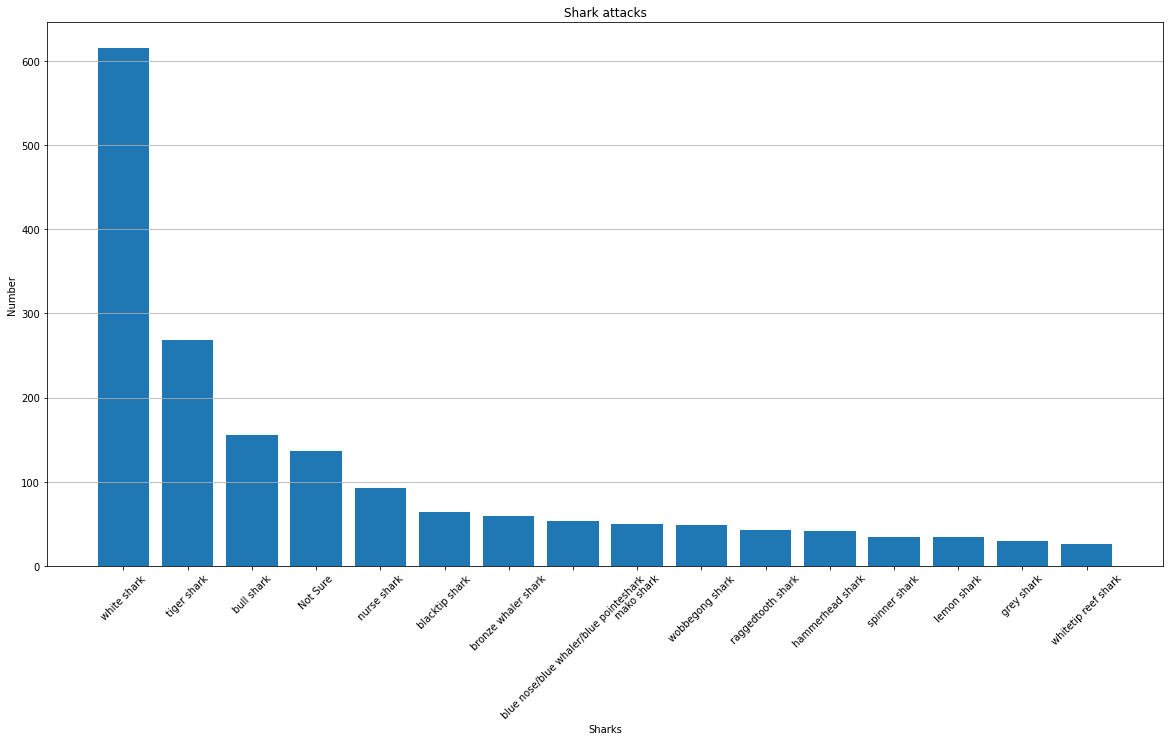

In [ ]:
# make a vertical bar chart with a bar for each column
fig, ax = plt.subplots()
sharks = q1a_bool.index
attack_counts = q1a_bool.loc[:,'number_of_attacks']
ax.bar(sharks, attack_counts)
plt.xticks(rotation=45)
plt.xlabel("Sharks")
plt.ylabel("Number")
plt.title("Shark attacks")
ax.grid(True, axis="y")
fig.set_size_inches(20,10)
plt.show()

## Vraag 1b. Welke haaien soort geeft het grootste percentage attacks met fatale afloop?

### Uitwerking

Nu de kolommen Fatal(Y/N) en New_Species samen bekijken.

Je wilt dus voor elke specifiek haaien soort in de kolom New_Species weten wat het percentage Y is en het percentage N.

In [ ]:
q1b = pd.crosstab(df3["New_Species"], df3["Fatal (Y/N)"])

In [ ]:
q1b.columns
# De eerste kolom  is nu een index!

Index(['N', 'Y'], dtype='object', name='Fatal (Y/N)')

In [ ]:
# Nu een nieuwe kolom maken met het percentage fatal per haaiensoort
q1b['Percentage_fatal'] = ((q1b.loc[:, 'Y']/(q1b.loc[:, 'Y'] + q1b.loc[:,'N']))*100).round(3)

In [ ]:
q1b.columns

Index(['N', 'Y', 'Percentage_fatal'], dtype='object', name='Fatal (Y/N)')

In [ ]:
# Gebruik een boolean mask om alleen die rijen weer te geven met een percentage fatal van boven de 0.01 procent 
q1b_bool  = q1b.loc[q1b.loc[:, 'Percentage_fatal'] >= 0.01]
# ascending = True moest verwijderd worden,  anders werkte het niet

In [ ]:
# Nu dataframe sorteren:
q1b_bool= q1b_bool.sort_values(by=['Percentage_fatal'], ascending=False )


In [ ]:
# q1b met percentage fatal van boven de 0.01 procent
q1b_bool

Fatal (Y/N)                               N    Y  Percentage_fatal
New_Species                                                       
Not Sure                                 93   34            26.772
tiger shark                             197   67            25.379
white shark                             471  135            22.277
blue nose/blue whaler/blue pointeshark   40   11            21.569
bull shark                              124   31            20.000
whitetip reef shark                      21    5            19.231
zambesi shark                            19    4            17.391
mako shark                               48    2             4.000
bronze whaler shark                      56    2             3.448
lemon shark                              33    1             2.941
hammerhead shark                         41    1             2.381

### Verantwoording Conclusie:

Zie vraag 1a

Naast de kolom 'New_Species' wordt ook de kolom 'Fatal (Y/N)' gebruikt. Deze laatste kolom heeft een percentage missing values van 8,6 %.

Houdt wel in de gaten: Onderstaande conclusie is gebaseerd op de gebruikte dataset.

### **Conclusie**

De top 3 dodelijkste haaien is:

1.   Tiger shark: 25,4 % van de aanvallen van deze haai zijn dodelijk
2.   White shark: 22,3 % van de aanvallen van deze haai zijn dodelijk
2.   Blue shark (combinatie van blue nose, blue whaler en blue pointer shark): 21,6 % van de aanvallen van deze haai zijn dodelijk

De dodelijkste soort haai is de Tiger shark. Als de mens wordt aangevallen door de Tiger shark, is er 25 procent kans dat je het er niet levend vanaf brengt. Op de tweede plaats staat de White shark, met een fataliteit van 22 procent. Niet ver daarachter volgt de blue shark (combinatie van blue nose, blue whaler en blue pointer shark). (Zie barplot in cel hierna) 

Extra opmerking:

De rij waarin de haaiensoort niet precies bekend is ('Not Sure') geeft een nog hoger percentage fataliteit. Dit zou eventueel te verklaren kunnen zijn door bijvoorbeeld de volgende situatie:

> de persoon in kwestie die is aangevallen is misschien zo erg toegetakeld dat hij/zij het niet overleeft, en dus waarschijnlijk ook geen goede beschrijving van de haai kan geven.



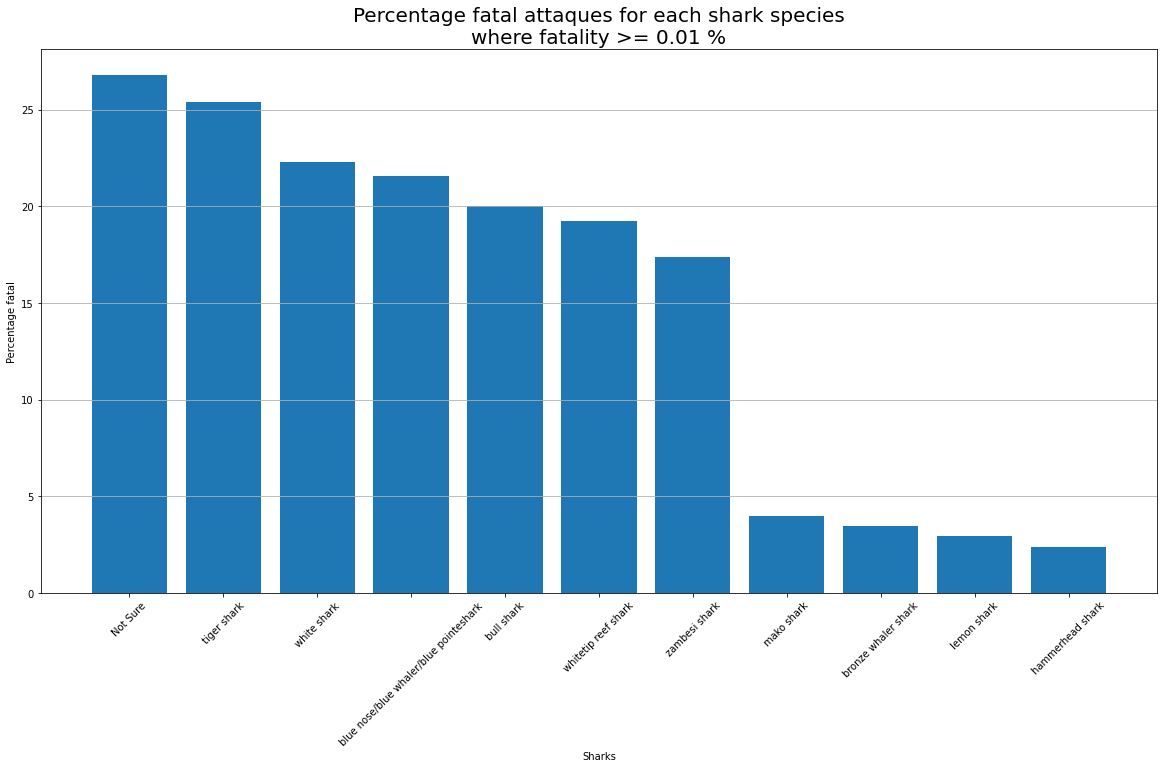

In [ ]:
# Barchart met percentage fataliteit per haai:
fig, ax = plt.subplots()
sharks = q1b_bool.index
percentage_fatal = q1b_bool.loc[:,'Percentage_fatal']
ax.bar(sharks, percentage_fatal)
plt.xticks(rotation=45)
plt.xlabel("Sharks")
plt.ylabel("Percentage fatal")
fontsize = 20
plt.title("Percentage fatal attaques for each shark species\nwhere fatality >= 0.01 %", fontsize=fontsize)
ax.grid(True, axis="y")
fig.set_size_inches(20,10) # Make chart a little bigger
plt.show()

## Vraag 1c 
Combineer de grafieken bij vraag 1a en vraag 1b voor een overzichtelijke grafiek die de percentages weergeeft van 'shark attacks' per haaien soort met daarin ook verwerkt de fataliteit per haaiensoort.


### Uitwerking

In [ ]:
# (Verder gaan met q1b om de grafieken uit vraag 1a en 1b te combineren in één grafiek)
# (Zie voor q1b vraag 1b)
# We hernoemen q1b tot q1c en werken hiermee verder
q1c = q1b

In [ ]:
# Voor deze vraag de rij 'Not Sure' verwijderen
# Deze hebben we al in de vorige vraag besproken en
# We werken nu verder met 'species' die zeker zijn
q1c = q1c.drop(['Not Sure'], axis = 0)

In [ ]:
# Totale aantal geregistreerde haaienaanvallen waarvan de soort bekend is:
total_attacks_N = q1c.loc[:, 'N'].sum()
total_attacks_N 
total_attacks_Y = q1c.loc[:, 'Y'].sum()
total_attacks_Y 
total_attacks = total_attacks_N + total_attacks_Y 
total_attacks
percentage_fatal = ((total_attacks_Y/total_attacks)*100).round(3)
print(f"Het totale aantal attacks dat niet fataal afloopt is {total_attacks_N}, het totale aantal attacks dat wel fataal afloopt is {total_attacks_Y}")
print(f"Het totale aantal attacks dat meedoet in deze berekening (en waarvan de soort dus bekend is) is {total_attacks}")
print(f"Het percentage attacks dat fataal afloopt is {percentage_fatal} %")

Het totale aantal attacks dat niet fataal afloopt is 1428, het totale aantal attacks dat wel fataal afloopt is 259
Het totale aantal attacks dat meedoet in deze berekening (en waarvan de soort dus bekend is) is 1687
Het percentage attacks dat fataal afloopt is 15.353 %


In [ ]:
# Maak nieuwe kolom met totaal percentage N per rij 'perc_N_overall':
q1c.loc[:, 'perc_N_overall'] = ((q1c.loc[:,'N']/total_attacks)*100).round(3)

In [ ]:
# Maak nieuwe kolom met totaal percentage Y per rij:
q1c['perc_Y_overall'] = ((q1c.loc[:, 'Y']/total_attacks)*100).round(3)

In [ ]:
q1c.columns


Index(['N', 'Y', 'Percentage_fatal', 'perc_N_overall', 'perc_Y_overall'], dtype='object', name='Fatal (Y/N)')

In [ ]:
# Maak nieuwe kolom 'sumNY'
q1c['sumNY'] = q1c['N'] + q1c['Y']

In [ ]:
# dataframe sorteren op kolom 'sumNY'
q1c.sort_values(by = ['sumNY'], inplace=True)

In [ ]:
# Extra controle
# Controleren of de som van de bovenstaande kolommen echt 100% is!!!
total_percentage = q1c.loc[:, 'perc_N_overall'].sum() + q1c.loc[:, 'perc_Y_overall'].sum()
total_percentage
# Dit klopt!

99.999

In [ ]:
# Niet echt nodig,maar gebruikt om te controleren of alles klopt
# Maak een nieuwe kolom 'perc_overall' (som van 'pers_N_overall' en/of 'pers_Y_overall')
q1c['perc_overall'] = (q1c.loc[:, 'perc_N_overall'] + q1c.loc[:, 'perc_Y_overall']).round(3)
# Maak een nieuwe kolom 'perc_sum_NY'
q1c['perc_sum_NY'] = (q1c.loc[:, 'sumNY']/(q1c.loc[:, 'sumNY'].sum())*100).round(3)
# en vergelijk deze!!!
q1c
# Klopt!


Fatal (Y/N)                               N    Y  Percentage_fatal  \
New_Species                                                          
bonita shark                              1    0             0.000   
copper shark                              5    0             0.000   
porbeagle shark                           7    0             0.000   
carpet shark                              8    0             0.000   
dusky shark                              13    0             0.000   
sevengill shark                          15    0             0.000   
caribbean reef shark                     18    0             0.000   
zambesi shark                            19    4            17.391   
whitetip reef shark                      21    5            19.231   
grey shark                               29    0             0.000   
lemon shark                              33    1             2.941   
spinner shark                            35    0             0.000   
hammerhead shark                         41    1             2.381   
raggedtooth shark                        43    0             0.000   
wobbegong shark                          48    0             0.000   
mako shark                               48    2             4.000   
blue nose/blue whaler/blue pointeshark   40   11            21.569   
bronze whaler shark                      56    2             3.448   
blacktip shark                           64    0             0.000   
nurse shark                              92    0             0.000   
bull shark                              124   31            20.000   
tiger shark                             197   67            25.379   
white shark                             471  135            22.277   

Fatal (Y/N)                             perc_N_overall  perc_Y_overall  sumNY  \
New_Species                                                                     
bonita shark                                     0.059           0.000      1   
copper shark                                     0.296           0.000      5   
porbeagle shark                                  0.415           0.000      7   
carpet shark                                     0.474           0.000      8   
dusky shark                                      0.771           0.000     13   
sevengill shark                                  0.889           0.000     15   
caribbean reef shark                             1.067           0.000     18   
zambesi shark                                    1.126           0.237     23   
whitetip reef shark                              1.245           0.296     26   
grey shark                                       1.719           0.000     29   
lemon shark                                      1.956           0.059     34   
spinner shark                                    2.075           0.000     35   
hammerhead shark                                 2.430           0.059     42   
raggedtooth shark                                2.549           0.000     43   
wobbegong shark                                  2.845           0.000     48   
mako shark                                       2.845           0.119     50   
blue nose/blue whaler/blue pointeshark           2.371           0.652     51   
bronze whaler shark                              3.320           0.119     58   
blacktip shark                                   3.794           0.000     64   
nurse shark                                      5.453           0.000     92   
bull shark                                       7.350           1.838    155   
tiger shark                                     11.678           3.972    264   
white shark                                     27.919           8.002    606   

Fatal (Y/N)                             perc_overall  perc_sum_NY  
New_Species                                                        
bonita shark                                   0.059        0.059  
copper shark       

### Verantwoording Conclusie:

Zie vraag 1a

Er is voor gekozen om de rij 'Not Sure'(waarbij de soort niet helemaal  duidelijk was) niet mee te nemen in de berekening van het percentage 'shark attacks' per soort. Er wordt bij de beantwoording van deze vraag dus alleen gewerkt met de 'shark attacks' waarbij geheel duidelijk is door welke haai de aanval is gedaan!

Houdt wel in de gaten: Onderstaande conclusie is gebaseerd op de gebruikte dataset.

### **Conclusie: (De samengestelde grafiek)**

Combi grafiek, nu twee grafieken van vraag 1a en vraag 1b gecombineerd, zodat in één blik duidelijk is hoe de percentages verdeeld zijn. (Zie barplot in cel hierna) 

Als het totaal van alle shark attacks (waarbij de aanvallende haai bekend is) op 100 % wordt gezet, dan hebben we de volgende top 3 wat betreft de aanvallen door een haaiensoort:

1.   35,9 % van de aanvallen gebeurd door de 'white shark'
2.   15,6 % van de aanvallen gebeurd door de 'tiger shark'
3.   9,2 % van de aanvallen gebeurd door de 'bull shark'

In totaal zijn 15,3 % van alle haaien aanvallen fataal

De top drie van fatale haaien aanvallen wordt hieronder gegeven:
(Let op! Het totale aantal haaienaanvallen -fataal en niet fataal samen- is hier op 100 % gesteld)

1.   8,0 % fataal door een 'white shark'
2.   4,0 % fataal door een 'tiger shark'
3.   1,8 % fataal door een 'bull shark'

Bovenstaande haaien zijn met zijn drieen verantwoordelijk voor 13,8 % van de fatale aanvallen (van de in totaal 15,3 % fatale aanvallen). In totaal zijn deze drie haaien dus verantwoordelijk voor ((13,8/15,3)*100%) = 90 procent van de fatale haaien aanvallen.

Ook bij vraag 1b kwamen deze drie haaien als het meest gevaarlijk uit de bus, als je keek naar het percentage van de aanvallen dat dodelijk was door de betreffende haai. (Hieronder volgt nog een keer de uitkomst van vraag 1b). Alleen staat bij deze top drie de 'tiger shark' op 1 en de 'white shark' op 2.

> De top 3 dodelijkste haaien zijn:

1.   Tiger shark: 25,4 % van de aanvallen van deze haai zijn dodelijk
2.   White shark: 22,3 % van de aanvallen van deze haai zijn dodelijk
2.   Blue shark (combinatie van blue nose, blue whaler en blue pointer shark): 21,6 % van de aanvallen van deze haai zijn dodelijk



***De meest gevaarlijke haaien voor mensen zijn de 'white shark', de 'tiger shark' en de 'bull shark. ***

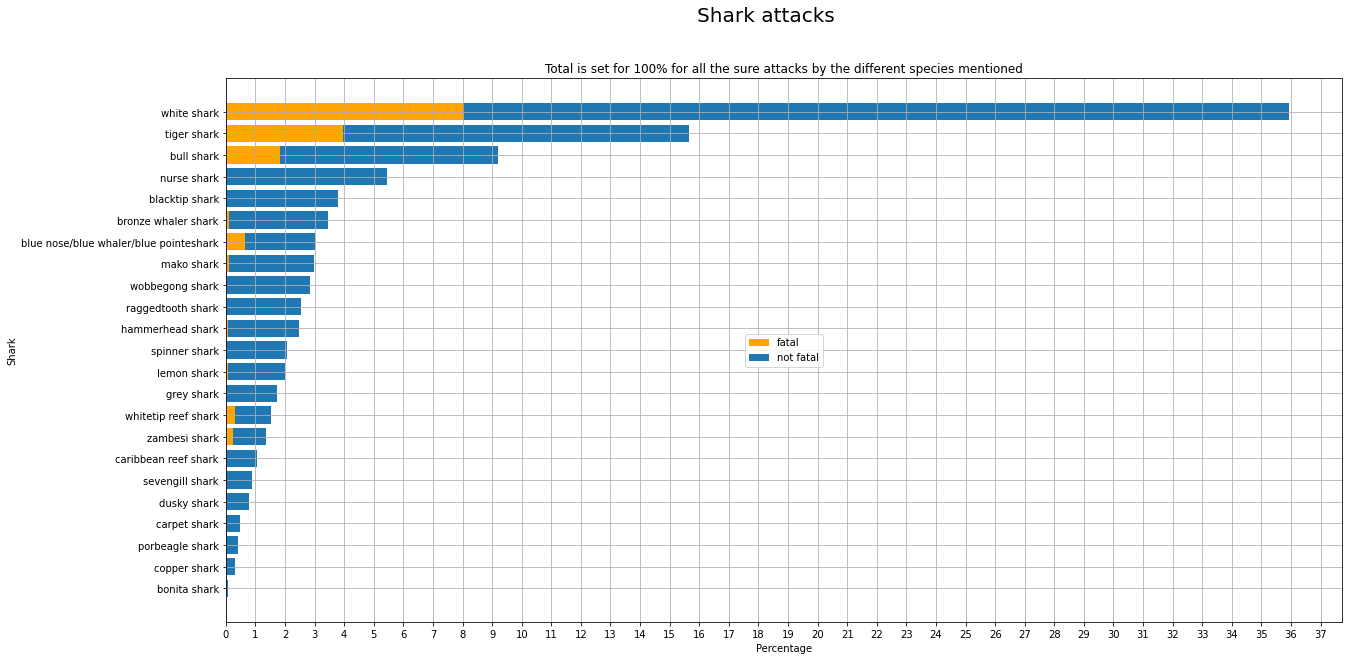

In [ ]:
# Maak nu een nieuwe horizontale bar chart met deze gegevens!
# Maak een horizontal bar chart met stacked columns van 'percentage_N_overall' en 'percentage_Y_overall'
fig, ax = plt.subplots()
sharks = q1c.index
percentage_fatal_N = q1c.loc[:,'perc_N_overall']
percentage_fatal_Y = q1c.loc[:,'perc_Y_overall']
ax.barh(sharks, percentage_fatal_Y, label = 'fatal', color='orange')
ax.barh(sharks, percentage_fatal_N, label = 'not fatal', left=percentage_fatal_Y)
plt.xlabel("Percentage")
plt.ylabel("Shark")
ax.legend(loc='center')
fontsize = 20
plt.suptitle("Shark attacks", fontsize = fontsize)
fontsize_2 = 12
plt.title("Total is set for 100% for all the sure attacks by the different species mentioned", fontsize = fontsize_2)
ax.grid(True, axis="y")
ax.grid(True, axis="x")
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
fig.set_size_inches(20,10)
plt.show()

# 2. Are children more likely to be attacked by sharks?


### Uitwerking
Hiervoor is de kolom 'Age' en de kolom 'Fatal (Y/N)' nodig

Aanname:

Kind < 18 jaar
Volwassene >= 18 jaar
Er is uitgegaan van de aanwezige gegevens uit de gebruikte csv file

In [ ]:
# Maak nieuw dataframe met alleen de kolommen die nodig zijn voor het beantwoorden van de vraag
age = df3.loc[:, ['Age', 'Fatal (Y/N)']]

# Verwijder alle rijen met NaN's:
age = age.dropna()

# Maak een nieuwe lege kolom 'Adult/Child'
age.loc[:, 'Adult/Child'] =0

# Als de leeftijd van een persoon gelijk of groter dan 18 jaar is zet 'adult' in deze kolom
# In alle andere gervallen zet 'child' in deze kolom
# Vul de nieuwe kolom 'Adult/Child'
age.loc[:, 'Adult/Child'] = np.where(age['Age'] >= 18, 'adult', 'child')

# age

In [ ]:
rows_worked_with_age = age.shape[0]
print(f'Er wordt nu gewerkt met {rows_worked_with_age} rijen van de oorspronkelijk {rows_worked_with_df3}')
percentage_missing_data_age =  round(((rows_worked_with_df3 - rows_worked_with_age)/rows_worked_with_df3)* 100,1)
percentage_rows_worked_with_age = 100 - percentage_missing_data_age
print(f'Dat betekent dat er gewerkt wordt met {percentage_rows_worked_with_age}% van de oorspronkelijke rijen van de dataframe')
print(f'De totale percentage missing data is dus: {percentage_missing_data_age}%')

Er wordt nu gewerkt met 3222 rijen van de oorspronkelijk 6302
Dat betekent dat er gewerkt wordt met 51.1% van de oorspronkelijke rijen van de dataframe
De totale percentage missing data is dus: 48.9%


In [ ]:
# maak tabel met uitgesplitst adult/child en fatal Y/N
age_fatal_groupby = age.groupby(['Adult/Child', 'Fatal (Y/N)']).count()

# Hernoem de 'Age' kolom naar 'Counts'
age_fatal_groupby = age_fatal_groupby.rename(columns={'Age':'Counts'})

# Maak nieuwe kolom "Percentage"
age_fatal_groupby['Percentage']= round((age_fatal_groupby.loc[:,'Counts']/age_fatal_groupby.loc[:, 'Counts'].sum())*100,3) 
age_fatal_groupby

Counts  Percentage
Adult/Child Fatal (Y/N)                    
adult       N              1888      58.597
            Y               453      14.060
child       N               720      22.346
            Y               161       4.997

In [ ]:
age_fatal_groupby.columns

Index(['Counts', 'Percentage'], dtype='object')

In [ ]:
# Verschillende cellen aanroepen met iloc:
print(f'Het totale percentage wordt op 100% gezet voor de volgende vier verschillende subgroepen samen:')
print(f'volwassenen/niet fataal   volwassenen/fataal  kinderen/niet fataal   kinderen/fataal\n')
adult_fatal_percentage = age_fatal_groupby.iloc[1,1] 
adult_non_fatal_percentage = age_fatal_groupby.iloc[0,1] 
child_fatal_percentage = age_fatal_groupby.iloc[3,1] 
child_non_fatal_percentage = age_fatal_groupby.iloc[2,1] 
percentage_adults = adult_fatal_percentage + adult_non_fatal_percentage
percentage_childs = child_fatal_percentage + child_non_fatal_percentage
print(f'Het percentage volwassenen dat wordt aangevallen is {percentage_adults}%')
print(f'Het percentage kinderen dat wordt aangevallen is {percentage_childs}%\n')
print(f'Het percentage volwassenen dat wordt aangevallen én dat fataal afloopt is {adult_fatal_percentage}%')
print(f'Het percentage volwassenen dat wordt aangevallen én dat niet fataal afloopt is {adult_non_fatal_percentage}%')
print(f'Het percentage kinderen dat wordt aangevallen én dat fataal afloopt is {child_fatal_percentage}%')
print(f'Het percentage kinderen dat wordt aangevallen én dat niet fataal afloopt is {child_non_fatal_percentage}%\n')
percentage_fatal_attacks_in_group_adults = round(adult_fatal_percentage/(adult_fatal_percentage + adult_non_fatal_percentage) * 100, 3)
percentage_fatal_attacks_in_group_childs = round(child_fatal_percentage/(child_fatal_percentage + child_non_fatal_percentage) * 100, 3)
print(f'NU DE VERHOUDING FATALE AANVALLEN TOV ALLE AANVALLEN BIJ VOLWASSENEN:\n')
print(f'Nu wordt het percentage volwassenen op 100% gesteld:')
print(f'The percentage fatal attacks in the group of adults is {percentage_fatal_attacks_in_group_adults}%\n')
print(f'NU DE VERHOUDING FATALE AANVALLEN TOV ALLE AANVALLEN BIJ KINDEREN:\n')
print(f'Nu wordt het percentage kinderen op 100% gesteld:')
print(f'The percentage fatal attacks in the group of childs is {percentage_fatal_attacks_in_group_childs}%')

Het totale percentage wordt op 100% gezet voor de volgende vier verschillende subgroepen samen:
volwassenen/niet fataal   volwassenen/fataal  kinderen/niet fataal   kinderen/fataal

Het percentage volwassenen dat wordt aangevallen is 72.657%
Het percentage kinderen dat wordt aangevallen is 27.343%

Het percentage volwassenen dat wordt aangevallen én dat fataal afloopt is 14.06%
Het percentage volwassenen dat wordt aangevallen én dat niet fataal afloopt is 58.597%
Het percentage kinderen dat wordt aangevallen én dat fataal afloopt is 4.997%
Het percentage kinderen dat wordt aangevallen én dat niet fataal afloopt is 22.346%

NU DE VERHOUDING FATALE AANVALLEN TOV ALLE AANVALLEN BIJ VOLWASSENEN:

Nu wordt het percentage volwassenen op 100% gesteld:
The percentage fatal attacks in the group of adults is 19.351%

NU DE VERHOUDING FATALE AANVALLEN TOV ALLE AANVALLEN BIJ KINDEREN:

Nu wordt het percentage kinderen op 100% gesteld:
The percentage fatal attacks in the group of childs is 18.275%


### Verantwoording conclusie:

Er is voor het beantwoorden van deze vraag gebruik gemaakt van de kolom 'Age' en de kolom 'Fatal (Y/N)'.

Als alle missing values uit beide kolommen zijn verwijderd, wordt er verder gewerkt met 51% van het aantal rijen van de oorspronkelijke database. De 'Age' kolom draagt het meeste bij aan de missing values (45 %). 

Houdt wel in de gaten: Onderstaande conclusie is gebaseerd op de gebruikte dataset.

### **Conclusie**

Er worden meer volwassenen dan kinderen aangevallen door haaien.

Het percentage volwassenen dat wordt aangevallen door haaien bedraagt 72,6%. 
Het percentage kinderen dat wordt aangevallen door haaien bedraagt 27,4%
(Zie barplot in cel hierna) 

Hierbij moet de kanttekening gemaakt worden dat dit geldt voor de geregistreerde
attacks uit de gebruikte database. Wat je eigenlijk ook nog nodig hebt is het percentage kinderen en volwassenen dat zich wel eens in zee begeeft en dan het liefst ook nog met de tijdsduur erbij. Dan kun je de per tijdseenheid aanwezige persoon (kind of volwassene) in zee afzetten tegen het aanvalspercentage van de twee groepen.

Dan heb je pas echt de vraag beantwoord of de kans dat kinderen worden aangevallen groter of kleiner is dan dat volwassenen worden aangevallen.

De verhouding fatale aanvallen bij volwassenen en de verhouding fatale aanvallen bij kinderen ontloopt elkaar niet veel.
Als het totale percentage aanvallen op volwassenen op 100% wordt gesteld, dan loopt 19,4% fataal af.
Als het totale percentage aanvallen op kinderen op 100% wordt gesteld, dan loopt 18,4% fataal af.

Hieronder het overzichtsplaatje, waarneer het totale aantal aanvallen (van kinderen en volwassenen samen) op 100% is gezet:

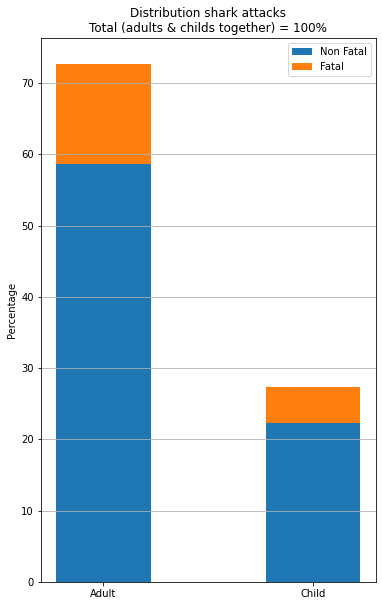

In [ ]:
# Maak een stacked bar chart van  de hierboven genoemde waardes
labels = ['Adult', 'Child']
non_fatal = [adult_non_fatal_percentage, child_non_fatal_percentage]
fatal = [adult_fatal_percentage, child_fatal_percentage]
width = 0.45       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
ax.bar(labels, non_fatal, width,  label='Non Fatal')
ax.bar(labels, fatal, width, bottom=non_fatal, label='Fatal')
ax.set_ylabel('Percentage')
ax.set_title('Distribution shark attacks\nTotal (adults & childs together) = 100%')
ax.legend()
ax.grid(True, axis='y')
fig.set_size_inches(6,10) # Make chart a little bigger
plt.show()


In [ ]:
# Leuk artikel over shark attacks in Australie:
# https://royalsocietypublishing.org/doi/10.1098/rsos.201197

# 3. Are shark attacks where sharks were provoked more or less dangerous?


### Uitwerking

Hiervoor zijn de kolommen 'Type' en 'Fatal (Y/N)' nodig.


De vraag wordt als volgt opgevat:
Zit er tussen 'provoked' en 'unprovoked' een verschil in fataliteit?

In [ ]:
# Neem een dataframe met alleen de kolommen 'Type' en 'Fatal (Y/N)'
q3 = df3[['Type', 'Fatal (Y/N)']].copy()

In [ ]:
# Verwijder alle rijen waarin een Null value voorkomt in de kolommen 'Type' en 'Fatal(Y/N)'
q3 = q3.dropna(how='any',axis=0) # Dit verwijdert alle null values in alle kolommen

In [ ]:
rows_worked_with_q3 = q3.shape[0]
rows_worked_with_df3
percentage_worked_with_in_q3 = round(((rows_worked_with_q3)/(rows_worked_with_df3))*100,1)
print(f'Er wordt bij het beantwoorden van deze vraag gewerkt met {percentage_worked_with_in_q3}%\nvan de rijen van het oorspronkelijke dataframe')

Er wordt bij het beantwoorden van deze vraag gewerkt met 80.9%
van de rijen van het oorspronkelijke dataframe


In [ ]:
# Voor het beantwoorden van de vraag hebben we nodig:
# Het percentage fatale aflopen binnen de groep 'provoked'
# Het percentage fatale aflopen binnen de groep 'unprovoked'

# D.m.v.groupby de dataframe bekijken hierop
q3_groupby = q3.groupby(by=['Type', 'Fatal (Y/N)'])['Fatal (Y/N)'].count()

In [ ]:
q3_groupby

Type        Fatal (Y/N)
Provoked    N               549
            Y                19
Unprovoked  N              3351
            Y              1181
Name: Fatal (Y/N), dtype: int64

In [ ]:
# Eerst alles omzetten naar percentages
# stel alles van 'Provoked' op 100%
# stel alles van 'Unprovoked' op 100%
# En vergelijk dan de percentages voor 'fatal'

In [ ]:
percentage_fatal_provoked = round(q3_groupby.iloc[1]/(q3_groupby.iloc[0] + q3_groupby.iloc[1])*100,3)
percentage_fatal_unprovoked = round(q3_groupby.iloc[3]/(q3_groupby.iloc[2] + q3_groupby.iloc[3])*100,3)
percentage_not_fatal_provoked = 100 - percentage_fatal_provoked
percentage_not_fatal_unprovoked = 100 - percentage_fatal_unprovoked

print(f"Het percentage fatale attacks onder de 'provoked' gevallen is {percentage_fatal_provoked}%")
print(f"Het percentage fatale attacks onder de 'unprovoked' gevallen is {percentage_fatal_unprovoked}%")

Het percentage fatale attacks onder de 'provoked' gevallen is 3.345%
Het percentage fatale attacks onder de 'unprovoked' gevallen is 26.059%


### Verantwoording conclusie:

Er is voor het beantwoorden van deze vraag gebruik gemaakt van de kolommen 'Type' en 'Fatal (Y/N)'.

Het percentage missing values in de dataframe q3 (kolommen 'Type' en 'Fatal (Y/N)') bedraagt 19,1 %

Al met al een redelijk laag percentage missing values. Conclusies die hieruit worden getrokken zijn redelijk goed betrouwbaar. Vooral ook omdat het verschil tussen de fataliteit van provoked en unprovoked attacks zo grooot is.

Houdt wel in de gaten: Onderstaande conclusie is gebaseerd op de gebruikte dataset.

### **Conclusie**

Als er vanuit wordt gegaan dat de fataliteit een maat is voor 'dangerous', dan kunnen we concluderen dat onder de 'unprovoked' attacks de fataliteit heel veel groter is (26,1 %) dan onder de 'provoked' attacks'(3,3 %).

Voor een overzicht van de verschillende percentages,  ook ten opzichte van elkaar, zie de onderstaande bar charts.

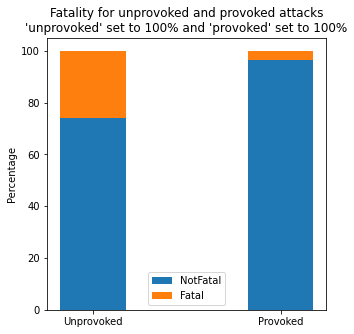

In [ ]:
# verticale barchart maken
labels = ['Unprovoked', 'Provoked']
not_fatal = [percentage_not_fatal_unprovoked, percentage_not_fatal_provoked]
fatal = [percentage_fatal_unprovoked, percentage_fatal_provoked]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, not_fatal, width, label='NotFatal')
ax.bar(labels, fatal, width, bottom=not_fatal, label='Fatal')

ax.set_ylabel('Percentage')
ax.set_title("Fatality for unprovoked and provoked attacks\n'unprovoked' set to 100% and 'provoked' set to 100%")
ax.legend()

fig.set_size_inches(5,5) # Make chart a little bigger

plt.show()

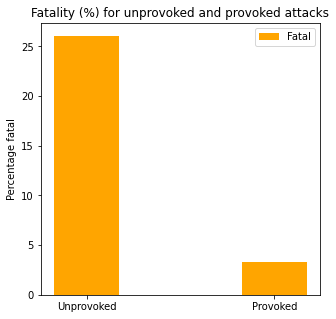

In [ ]:
# Eigenlijk is het nog beter te zien als je alleen het percentage fataliteit per
# provoked of unprovoked attack geeft
labels = ['Unprovoked', 'Provoked']
fatal = [percentage_fatal_unprovoked, percentage_fatal_provoked]
width = 0.35       # the width of the bars: can also be len(x) sequence
c = 'orange'
fig, ax = plt.subplots()
ax.bar(labels, fatal, width, label='Fatal', color = c)
ax.set_ylabel('Percentage fatal')
ax.set_title('Fatality (%) for unprovoked and provoked attacks')
ax.legend()
fig.set_size_inches(5,5) # Make chart a little bigger

plt.show()

In [ ]:
# Wat je eigenlijk ook  nog wilt laten zien zijn de totale percentages van provoked attacks en unprovoked attacks.
# Gewoon voor een overzichtsplaatje
# Daarvoor stellen we het totaal van provoked en unprovoked samen op 100%
# En geven daarna de percentages weer in een grafiek
percentage_total =round((q3_groupby.iloc[0] + q3_groupby.iloc[1] + q3_groupby.iloc[2] + q3_groupby.iloc[3])/(q3_groupby.iloc[0] + q3_groupby.iloc[1] + q3_groupby.iloc[2] + q3_groupby.iloc[3]) * 100,3)
percentage_unprovoked_total = round((q3_groupby.iloc[3] + q3_groupby.iloc[2])/(q3_groupby.iloc[0] + q3_groupby.iloc[1] + q3_groupby.iloc[2] + q3_groupby.iloc[3]) * 100,3)
percentage_provoked_total = round((q3_groupby.iloc[1] + q3_groupby.iloc[0])/(q3_groupby.iloc[0] + q3_groupby.iloc[1] + q3_groupby.iloc[2] + q3_groupby.iloc[3]) * 100,3)
percentage_unprovoked_fatal_total = round(q3_groupby.iloc[3]/(q3_groupby.iloc[0] + q3_groupby.iloc[1] + q3_groupby.iloc[2] + q3_groupby.iloc[3]) * 100,3)
percentage_unprovoked_not_fatal_total = round(q3_groupby.iloc[2]/(q3_groupby.iloc[0] + q3_groupby.iloc[1] + q3_groupby.iloc[2] + q3_groupby.iloc[3]) * 100,3)
percentage_provoked_fatal_total = round(q3_groupby.iloc[1]/(q3_groupby.iloc[0] + q3_groupby.iloc[1] + q3_groupby.iloc[2] + q3_groupby.iloc[3]) * 100,3)
percentage_provoked_not_fatal_total = round(q3_groupby.iloc[0]/(q3_groupby.iloc[0] + q3_groupby.iloc[1] + q3_groupby.iloc[2] + q3_groupby.iloc[3]) * 100,3)

print(f'Als het totaal van alle bewezen provoked en unprovoked aanvallen op\n100 % worden gesteld, dan krijg je de volgende percentages:\n')
print(f"Het percentage 'unprovoked' aanvallen bedraagt in totaal {percentage_unprovoked_total}%")
print(f"Het percentage 'provoked' aanvallen bedraagt in totaal {percentage_provoked_total}%\n")
print(f"Het percentage 'unprovoked' aanvallen die niet fataal zijn bedraagt in totaal {percentage_unprovoked_not_fatal_total}%")
print(f"Het percentage 'unprovoked' aanvallen die wel fataal zijn bedraagt in totaal {percentage_unprovoked_fatal_total}%")
print(f"Het percentage 'provoked' aanvallen die niet fataal zijn bedraagt in totaal {percentage_provoked_not_fatal_total}%")
print(f"Het percentage 'provoked' aanvallen die wel fataal zijn bedraagt in totaal {percentage_provoked_fatal_total}%")

Als het totaal van alle bewezen provoked en unprovoked aanvallen op
100 % worden gesteld, dan krijg je de volgende percentages:

Het percentage 'unprovoked' aanvallen bedraagt in totaal 88.863%
Het percentage 'provoked' aanvallen bedraagt in totaal 11.137%

Het percentage 'unprovoked' aanvallen die niet fataal zijn bedraagt in totaal 65.706%
Het percentage 'unprovoked' aanvallen die wel fataal zijn bedraagt in totaal 23.157%
Het percentage 'provoked' aanvallen die niet fataal zijn bedraagt in totaal 10.765%
Het percentage 'provoked' aanvallen die wel fataal zijn bedraagt in totaal 0.373%


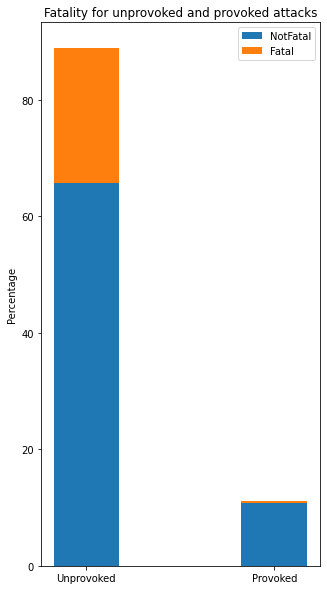

In [ ]:
# Bovenstaande percentages in een barchart om een beter overzicht te hebben:
labels = ['Unprovoked', 'Provoked']
not_fatal = [percentage_unprovoked_not_fatal_total, percentage_provoked_not_fatal_total]
fatal = [percentage_unprovoked_fatal_total, percentage_provoked_fatal_total]
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
ax.bar(labels, not_fatal, width, label='NotFatal')
ax.bar(labels, fatal, width, bottom=not_fatal, label='Fatal')
ax.set_ylabel('Percentage')
ax.set_title('Fatality for unprovoked and provoked attacks')
ax.legend()
fig.set_size_inches(5,10) # Make chart a little bigger

plt.show()

# Let op! Het percentage fatal in de provoked kolom is zo klein dat dit bijna niet meer te zien is.

# 4. Are certain activities more likely to result in a shark attack?

## Uitwerking

Eigenlijk is voor deze vraag alleen de kolom 'New_Activity' nodig,  want alles wat in de dataframe staat is al een shark attack. 'New_Activity' is de kolom die gebaseerd is op de kolom 'Activity', waarbij de meer dan 1500 unieke activiteiten worden opgeschoond tot een overzichtelijk aantal.

Zie hiervoor het hoofdstukje 'Dataframe: maken extra kolommen'

In [ ]:
# De value counts van de kolom 'New_Activity' bekijken:
df3.loc[:,"New_Activity"].value_counts(dropna=False)

surfing           1291
swimming          1027
fishing            955
NaN                843
Not Sure           725
diving             407
overboard          225
bathing            185
wading             169
standing           129
kayaking            51
floating            37
treading water      37
rafting             28
walking             26
canoeing            25
rowing              24
sea disaster        21
playing             21
feeding             15
collecting          14
washing             13
sailing             12
hunting              9
splashing            8
filming              5
Name: New_Activity, dtype: int64

In [ ]:
# Maak een dataframe van de value_counts (Missing values verdwijnen hierbij)
q4 = df3['New_Activity'].value_counts().to_frame()

In [ ]:
# Rename de kolom 'New_Activity' naar 'Count'
q4 = q4.rename(columns={'New_Activity': "Count"})

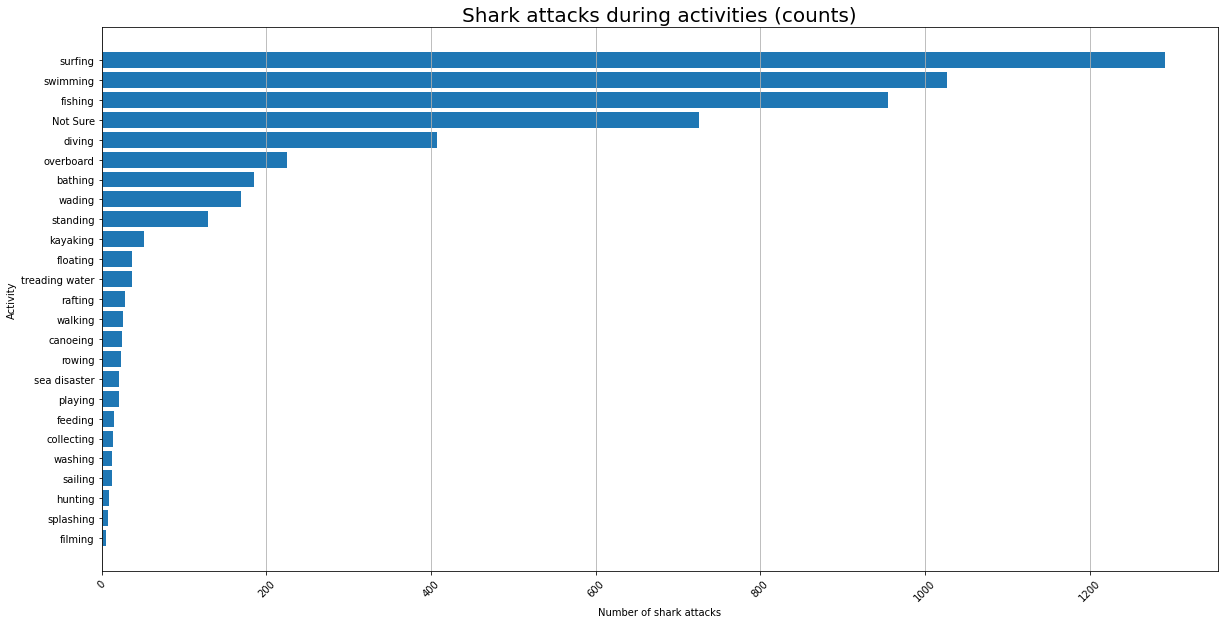

In [ ]:
# Maak er een horizontale barchart van

fig, ax = plt.subplots()
activity = q4.index
activity_counts = q4.loc[:,'Count']
ax.barh(activity, activity_counts)
plt.xticks(rotation=45)
plt.xlabel("Number of shark attacks")
plt.ylabel("Activity")
fontsize = 20
plt.title("Shark attacks during activities (counts)", fontsize=fontsize)
ax.grid(True, axis="x")
ax.invert_yaxis()
fig.set_size_inches(20,10) # Make chart a little bigger

plt.show()

In [ ]:
# Percentage 'Not Sure' uitrekenen na verwijderen missing values:
percentage_not_sure_2  = round((q4.loc['Not Sure', 'Count']/q4.loc[:, 'Count'].sum())* 100,3)
percentage_not_sure_2
print(f'Het percentage "Not Sure" (activiteiten die niet geheel eenduidig zijn)')
print(f'bedraagt {percentage_not_sure_2}% van de toale activiteiten na verwijdering van de null-values')



Het percentage "Not Sure" (activiteiten die niet geheel eenduidig zijn)
bedraagt 13.281% van de toale activiteiten na verwijdering van de null-values


In [ ]:
# Er is voor gekozen de rij 'Not Sure' (bevattende de activiteiten die niet geheel duidelijk zijn) te verwijderen
# Daarna alles omzetten naar percentages
# Waarbij de som van de 'Count' kolom op 100% wordt gesteld
q4_drop_not_sure = q4.drop('Not Sure')


In [ ]:
# Maak een nieuwe kolom 'Percentage_NA'
sum_row_NA = q4_drop_not_sure.loc[:, 'Count'].sum()

q4_drop_not_sure['Percentage_NA'] = round(((q4_drop_not_sure['Count'])/sum_row_NA)* 100,3)
q4_drop_not_sure

Count  Percentage_NA
surfing          1291         27.271
swimming         1027         21.694
fishing           955         20.173
diving            407          8.597
overboard         225          4.753
bathing           185          3.908
wading            169          3.570
standing          129          2.725
kayaking           51          1.077
floating           37          0.782
treading water     37          0.782
rafting            28          0.591
walking            26          0.549
canoeing           25          0.528
rowing             24          0.507
sea disaster       21          0.444
playing            21          0.444
feeding            15          0.317
collecting         14          0.296
washing            13          0.275
sailing            12          0.253
hunting             9          0.190
splashing           8          0.169
filming             5          0.106

In [ ]:
rows_worked_with_activity = q4_drop_not_sure['Count'].sum()
percentage_worked_with_q4 = round((rows_worked_with_activity/ rows_worked_with_df3)*100,1)
percentage_missing_values_q4 = round(100 - percentage_worked_with_q4,1)
print(f'Het aantal rijen waarmee wordt gewerkt voor deze vraag is: {rows_worked_with_activity}')
print(f'Het percentage rijen waarmee gewerkt wordt bij deze vraag is {percentage_worked_with_q4}%')
print(f'Het percentage missing values bij deze vraag is {percentage_missing_values_q4}%')

Het aantal rijen waarmee wordt gewerkt voor deze vraag is: 4734
Het percentage rijen waarmee gewerkt wordt bij deze vraag is 75.1%
Het percentage missing values bij deze vraag is 24.9%


## Verantwoording Conclusie:
Om de vraag te kunnen beantwoorden is een nieuwe kolom gemaakt ('New_Activity'), gebaseerd op de gegevens van de kolom 'Activity', om het grote aantal unieke activiteiten (ongeveer 1500) terug te brengen tot een behapbaar, overzichtelijk aantal.         

Er is voor gekozen om alle activiteiten die de string 'surf' bevatten om te zetten naar de activiteit 'surfing'. Dit betekent dat alle volgende activiteiten onder surfen vallen: surf fishing, body surfing, windsurfing, paddle surfing en kite surfing. Ook de rijen waarin de string 'boarding' voorkomt werden omgezet naar de activiteit 'surfing'. Hieronder vallen body boarding en boogie boarding.

Hetzelde geldt voor de activiteit 'diving'. Alle rijen die de strings 'scuba diving', 'free diving', 'hookah diving' en 'skindiving' bevatten vallen onder de activiteit 'diving.

Onder 'fishing' vallen alle activiteiten met string 'fishing', waaronder'spearfishing', 'shark  fishing' en 'surf fishing'. 'surf fishing' (kust vissen) heb ik ook onder de activiteit 'fishing' laten vallen.

Elke activiteit die één de volgende strings ('boat', 'ship', 'overboard', 'fell',  'jump', 'sinking', 'swept, 'capsized', 'sunk', 'torpedoed', 'swept', 'ton', 'USS', 'sank', 'steamer', 'schooner' ) bevatten werden de activiteit 'overboard'.

Om alle gevallen uit te sluiten,  waarbij de activiteit niet helemaal duidelijk was, is er voor gekozen om alle rijen waarin de volgende strings voorkomen ('or', '?', '/' en/of '&') in de nieuwe kolom 'New_Activities' te benoemen als 'Not sure'. Het percentage 'Not sure' dat voorkomt in de kolom 'New-Activity' bedraagt (na verwijderen missing null-values) 13,3%. 

Er is voor gekozen om de rij 'Not Sure' (waarbij de activiteit niet helemaal  duidelijk was) niet mee te nemen in de berekening van het percentage 'shark attacks' per activiteit.

Het percentage missing values bij deze vraag is 24.9%

Houdt wel in de gaten: Onderstaande zijn conclusies die gebaseerd zijn op de gebruikte dataset.

## **Conclusie:**

Surfen (27,3 %), zwemmen (21,7 %) en vissen (20,2 %) zijn de activiteiten waarbij er de meeste 'shark attacks' plaatsvinden.

Zie onderstaande bargraph.

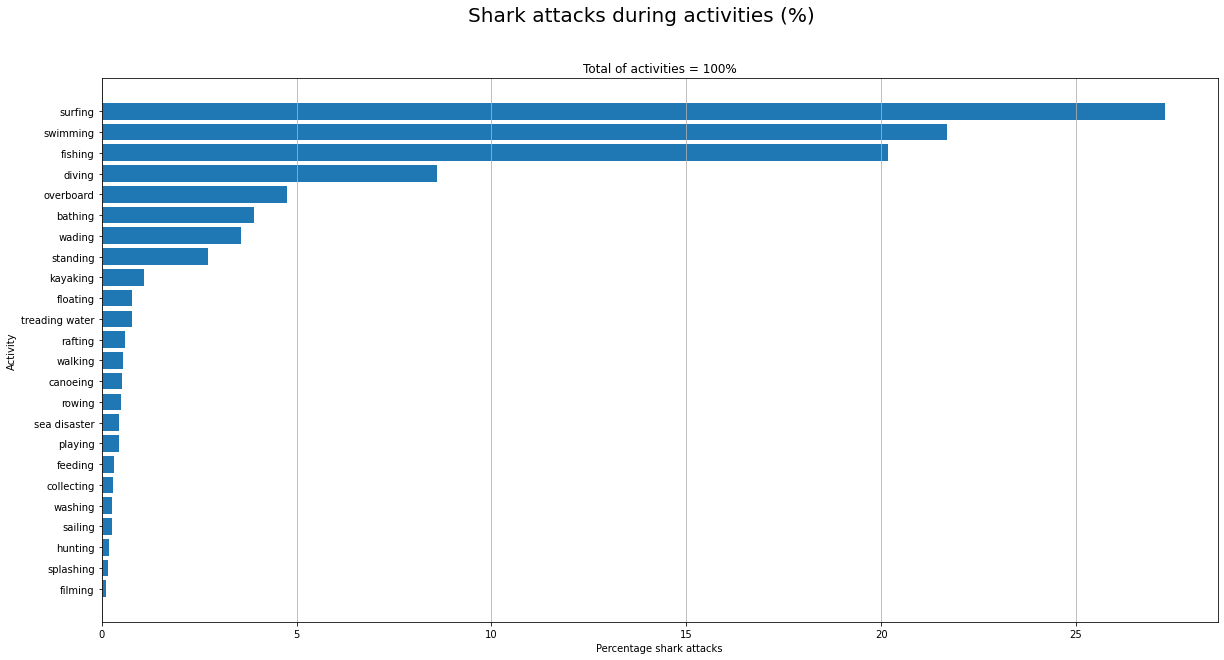

In [ ]:
# Maak horizontale barchart
fig, ax = plt.subplots()
activity = q4_drop_not_sure.index
percentage_NA = q4_drop_not_sure.loc[:,'Percentage_NA']
ax.barh(activity, percentage_NA)
plt.xlabel("Percentage shark attacks")
plt.ylabel("Activity")
fontsize = 20
plt.suptitle("Shark attacks during activities (%)", fontsize=fontsize)
fontsize2 = 12
plt.title("Total of activities = 100%", fontsize=fontsize2)
ax.grid(True, axis="x")
ax.invert_yaxis() # Draai y-as om
fig.set_size_inches(20,10) # Make chart a little bigger
plt.show()